In [10]:
#scrape web page
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

#printing top
print(str(table_html)[0])

motor = pd.read_html(str(table_html))[0]
motor

<


,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [11]:
#rydd datasettet
motor[['km', 'kWh']] = motor['WLTP-tall'].str.split('/', expand=True)
motor['STOPP'] = motor['STOPP'].str.replace('km', '')
motor['km'] = motor['km'].str.replace('km', '')
motor = motor.replace('x', np.nan)
motor[['km', 'STOPP']] = motor[['km', 'STOPP']].apply(pd.to_numeric)

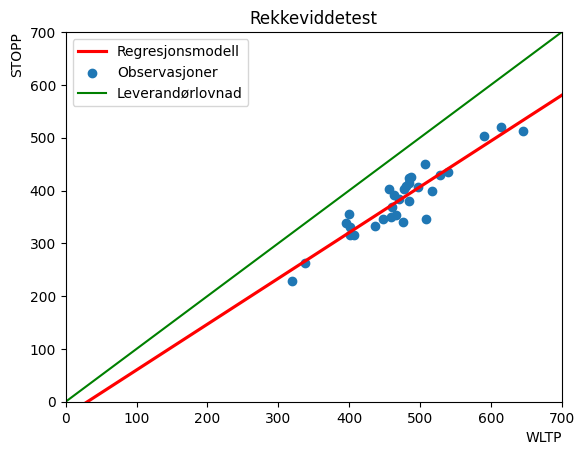

In [12]:
#plot
plt.xlim([0, 700]) 
plt.ylim([0, 700]) 
#regresjonslinje
sns.regplot(x='km', y='STOPP', data=motor, ci=None, truncate=False, scatter=False, color="red", label="Regresjonsmodell") 

plt.scatter(motor["km"], motor["STOPP"], label="Observasjoner") 
plt.plot(np.linspace(0, 700, num=10), np.linspace(0, 700, num=10),color="green", label="Leverandørlovnad") 
plt.title('Rekkeviddetest') 
plt.xlabel('WLTP', loc="right")
plt.ylabel('STOPP', loc="top")
plt.legend(loc="upper left")
plt.show()